# Modelo 1 - BBA CNN 1D

Esse primeiro modelo fará uso de redes neurais convolucionais para fazer a predição de compra ou venda de ações do Banco do Brasil.

Geralmente redes convolucionais são usadas para dados bidimensionais, geralmente imagens. Porém é possível criar um modelo unidimensional, porém os dados para isso devem ser preparados, já que o modelo irá tomar como entrada uma série de eventos anteriores a fim de prever uma saída.

Os dados fornecidos para a elaboração desse modelo já são apresentados dessa forma. Cada entrada cosiste em 15 dias antes do fechamento.

Dessa forma podemos apenas carregar os dados como estão.

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

TRAIN_ID = "1b8Ozu8ajEWfyIhLLZvXAwHTYPGBDD0pI"
TEST_ID  = "1b6IoY0gB5ZWL4k4NyvZSyZSbsBCkO7Sk"

URL_TRAIN = f"https://drive.google.com/uc?export=download&id={TRAIN_ID}"
URL_TEST  = f"https://drive.google.com/uc?export=download&id={TEST_ID}"

df_train = pd.read_csv(URL_TRAIN)
df_test  = pd.read_csv(URL_TEST)

print("Treino:", df_train.shape, "Teste:", df_test.shape)

Treino: (4735, 20) Teste: (1185, 20)


In [ ]:
df_test.head()

,Unnamed: 0,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,4736,2019-03-26,36.386158,37.917648,-1,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129
1,4737,2019-03-27,34.371300,37.563014,-1,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866
2,4738,2019-03-28,35.571316,37.363844,-1,34.371300,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150
3,4739,2019-03-29,36.089863,37.236446,-1,35.571316,34.371300,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489
4,4740,2019-04-01,36.445412,37.157342,-1,36.089863,35.571316,34.371300,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267


In [ ]:
df_train.tail()

,Unnamed: 0,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
4730,4731,2019-03-19,39.001053,38.947137,1,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,38.570271,39.212849
4731,4732,2019-03-20,38.126942,38.865118,-1,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,38.570271
4732,4733,2019-03-21,37.326935,38.711299,-1,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073
4733,4734,2019-03-22,35.297241,38.369894,-1,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908
4734,4735,2019-03-25,35.549099,38.087814,-1,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Date', 'Close', 'Smoothed_Close', 'Label',
       'Past_1_Days_Close', 'Past_2_Days_Close', 'Past_3_Days_Close',
       'Past_4_Days_Close', 'Past_5_Days_Close', 'Past_6_Days_Close',
       'Past_7_Days_Close', 'Past_8_Days_Close', 'Past_9_Days_Close',
       'Past_10_Days_Close', 'Past_11_Days_Close', 'Past_12_Days_Close',
       'Past_13_Days_Close', 'Past_14_Days_Close', 'Past_15_Days_Close'],
      dtype='object')

Apenas para termos uma ideia geral das tendências dessa série temporal vamos plotar um gráfico da data versus o valor de fechamento atenuado. Isso servirá apenas para nos dar uma ideia geral de como os dados se comportam.

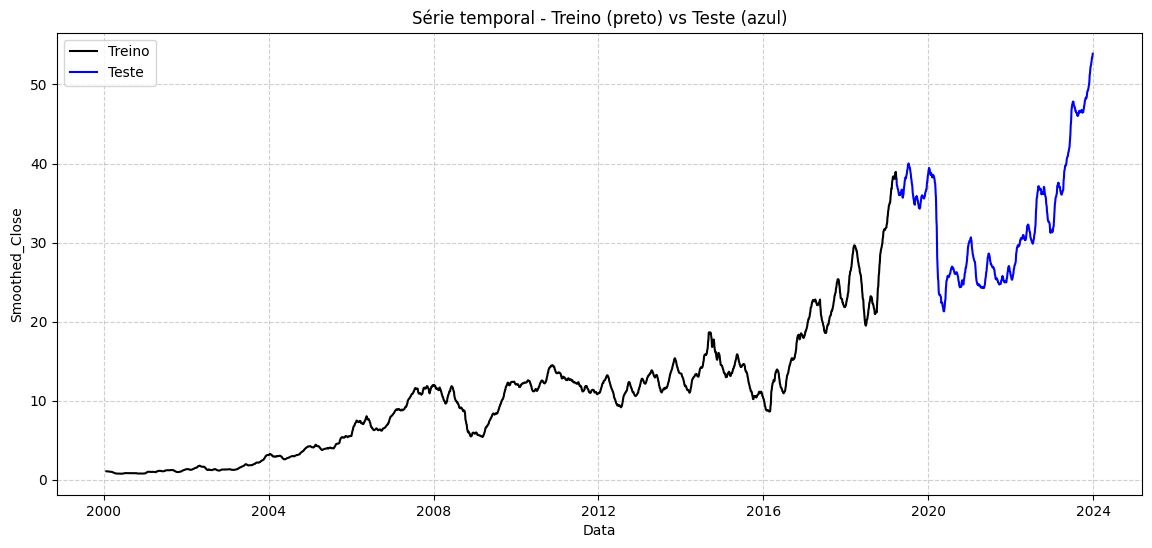

In [ ]:
import matplotlib.pyplot as plt


df_train["Date"] = pd.to_datetime(df_train["Date"], errors="coerce")
df_test["Date"]  = pd.to_datetime(df_test["Date"], errors="coerce")

plt.figure(figsize=(14,6))

plt.plot(df_train["Date"], df_train["Smoothed_Close"],
         color="black", label="Treino", linewidth=1.5)

plt.plot(df_test["Date"], df_test["Smoothed_Close"],
         color="blue", label="Teste", linewidth=1.5)

plt.xlabel("Data")
plt.ylabel("Smoothed_Close")
plt.title("Série temporal - Treino (preto) vs Teste (azul)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          4735 non-null   int64         
 1   Date                4735 non-null   datetime64[ns]
 2   Close               4735 non-null   float64       
 3   Smoothed_Close      4735 non-null   float64       
 4   Label               4735 non-null   int64         
 5   Past_1_Days_Close   4735 non-null   float64       
 6   Past_2_Days_Close   4735 non-null   float64       
 7   Past_3_Days_Close   4735 non-null   float64       
 8   Past_4_Days_Close   4735 non-null   float64       
 9   Past_5_Days_Close   4735 non-null   float64       
 10  Past_6_Days_Close   4735 non-null   float64       
 11  Past_7_Days_Close   4735 non-null   float64       
 12  Past_8_Days_Close   4735 non-null   float64       
 13  Past_9_Days_Close   4735 non-null   float64     

Esse dataframe não possui nenhum valor nulo, de maneira que nenhum manipulação será necessária. Além disso os conjuntos de treino e teste já foram forncecidos, então não será necessário fazer essa divisão. Caso essa divisão fosse necessária ela deveria ser feita com base no tempo, ou seja, os valores para treino deveriam ser valores passados mais no início da série temporal, enquanto que os valores de teste seriam os dados mais recentes.

No caso desse problema em específico nossa intenção não é prever o próximo valor, mas sim a ação que deverá ser tomada, representada por -1 para venda de ação e por 1 para compra de ação. A nossa entrada será uma série de 15 valores. Todas as demais colunas poderão ser descartadas da nossa análise.

In [ ]:
df_train_drop = df_train.drop(columns=['Unnamed: 0', 'Date', 'Close', 'Smoothed_Close'])
df_test_drop = df_test.drop(columns=['Unnamed: 0', 'Date', 'Close', 'Smoothed_Close'])

In [ ]:
print(df_train_drop.columns)

Index(['Label', 'Past_1_Days_Close', 'Past_2_Days_Close', 'Past_3_Days_Close',
       'Past_4_Days_Close', 'Past_5_Days_Close', 'Past_6_Days_Close',
       'Past_7_Days_Close', 'Past_8_Days_Close', 'Past_9_Days_Close',
       'Past_10_Days_Close', 'Past_11_Days_Close', 'Past_12_Days_Close',
       'Past_13_Days_Close', 'Past_14_Days_Close', 'Past_15_Days_Close'],
      dtype='object')


In [ ]:
print(df_train['Label'].unique())
print(df_test['Label'].unique())

[-1  1]
[-1  1]


Há dois valores únicos para a Label (saída), representados para -1 para venda e 1 para compra. Esse valores serão transformado em 0 para venda e 1 para compra.

In [ ]:
df_train_drop["Label"] = df_train_drop["Label"].replace(-1, 0)
print(df_train_drop['Label'].unique())

[0 1]


In [ ]:
df_test_drop["Label"] = df_test_drop["Label"].replace(-1, 0)
print(df_test_drop['Label'].unique())

[0 1]


# Modelo Conv1D

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, AveragePooling1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D

Antes de criar o nosso modelo vamos determinar quais são os valores das features de entrada e qual é a variável alvo para o nosso problema.

In [ ]:
y_train = df_train_drop['Label']
X_train = df_train_drop.drop(columns=['Label'])

y_test = df_test_drop['Label']
X_test = df_test_drop.drop(columns=['Label'])

In [ ]:
X_train.columns

Index(['Past_1_Days_Close', 'Past_2_Days_Close', 'Past_3_Days_Close',
       'Past_4_Days_Close', 'Past_5_Days_Close', 'Past_6_Days_Close',
       'Past_7_Days_Close', 'Past_8_Days_Close', 'Past_9_Days_Close',
       'Past_10_Days_Close', 'Past_11_Days_Close', 'Past_12_Days_Close',
       'Past_13_Days_Close', 'Past_14_Days_Close', 'Past_15_Days_Close'],
      dtype='object')

In [ ]:
print(X_train.shape, y_train.shape)

(4735, 15) (4735,)


Uma rede concolucional vai requerer um input com a seguinte estrutura: (batch_size, timesteps, input_dim).

Batch_size se refere a quantas amostras serão processadas por vez pela rede. Quando esse valor é pequeno o treino se torna mais ruidoso, porém é mais fácil de escapar de mínimos locais. Com esse tipo de configuração menos memória é requerida, porém o tempo total de treino é maior. Já quando se tem um batch_size grande o gradiente é calculado sobre um número grande de amostras, o que torna a estimativa mais estável e precisa. Um contra é o grande requerimento de memória, além de gerar um modelo com menos capacidade de generalização. O padrão é utilizar 32 amostras.

Timesteps se refere ao comprimento da sequência temporal de cada amostra da entrada, no nosso caso 15 dias.

input_dim é a quantidade de atributos que teremos em uma entrada, nesse caso estamos trabalhando apenas com o valor atenuado do fechamento dia a dia, então teremos apenas uma dimensão.

In [ ]:
TIMESTEPS = 15 #janela de tempo
FEATURES = 1 #estamos trabalhando apenas com o valor de fechamento atenuado
num_classes = 1 #se compra ou não

Para um problema 1D o tamanho do kernel representa quantos timesteps consecutivos a rede consegue olhar, ou seja a rede vai aprender padrões locais de 5 dias (para um kernell de 5). Um tamanho muito pequeno representa maior caputura de detalhes no aprendizado de padrões, mas corre o risco de ignorar padrões mais longos. Por esse motivo vamos começar com um tamanho de kernel menor para capturar melhor os detalhes e aumentar para poder compreender padrões maiores.

Para um caso de séries temporais o pooling não é necessário entre as camadas de convolução, ele vai deixar a rede mais leve, já que faz com que menos dados passem para as camadas seguintes, porém pode fazer com que o modelo perca detalhes importantes. No geral ele também ajudar a reduzir o overfitting, já que força a rede a olhar para padrões mais globais. Uma alternativa seria usar convolução com stride > 1, o que também diminuiria a dimensionalidade dos dados.

O dropout também é uma estratégia para reduçao de overfitting. Ao desativar alguns neurônios aleatoriamente durante o treino ele força a rede a distribuir o 'apredizado' de maneira mais uniforme entre todos os neurônios.

Padding do tipo causal será usado para forçar a rede a olhar apenas para o passado. Nesse caso o Pooling será do tipo médio e não máximo, o que irá reduzir o viés para picos, focando em tendências mais gerais.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, SpatialDropout1D
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense, Dropout, Flatten # Import Flatten

# Cria o modelo
model = Sequential()

# Bloco 1
model.add(Conv1D(8, kernel_size=3, padding="causal", input_shape=(TIMESTEPS, FEATURES)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))
print(model.output_shape)

# Bloco 2
model.add(Conv1D(16, kernel_size=4, padding="causal"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))
print(model.output_shape)

# Bloco 3
model.add(Conv1D(32, kernel_size=4, padding="causal"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))
print(model.output_shape)

# Pooling global
model.add(GlobalAveragePooling1D()) # Replaced Flatten with GlobalAveragePooling1D
print(model.output_shape)

# Camadas densas
#model.add(Dense(64, activation="relu"))
#print(model.output_shape)
#model.add(Dropout(0.3))

model.add(Dense(32, activation="relu"))
print(model.output_shape)
model.add(Dropout(0.3))

# Saída binária
model.add(Dense(1, activation="sigmoid"))
print(model.output_shape)

model.summary()

(None, 15, 8)
(None, 15, 16)
(None, 15, 32)
(None, 32)
(None, 32)
(None, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_74 (Conv1D)              │ (None, 15, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 15, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_53 (ReLU)                 │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_75 (Conv1D)              │ (None, 15, 16)         │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 15, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_54 (ReLU)                 │ (None, 15, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 15, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_76 (Conv1D)              │ (None, 15, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 15, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_55 (ReLU)                 │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_19     │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,953 (15.44 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 112 (448.00 B)

Por estarmos tratando de um problema de classificação binária (compra/venda) nossa ativação da camada de saída será sigmóide.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('model_best.keras', monitor='val_accuracy', mode= 'auto', save_best_only=True, verbose =1)

In [ ]:
primeira_posicao = df_train[df_train['Label'] == 1].index[0]
primeira_posicao

np.int64(66)

Como o primeiro rótulo 1 aparece apenas na posição 66 é possível que o modelo seja confundido por este viés inicial, de forma que vamos usar um tamanho de batch maior que o que geralmente seria usado.

In [ ]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape)
print(X_test.shape)

(4735, 15, 1)
(1185, 15, 1)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=80,
    batch_size=256,
    callbacks=[mcp_save],
    shuffle=False           # manter a ordem, já que se trata de série temporal
)


Epoch 1/80
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4672 - loss: 0.7344
Epoch 1: val_accuracy improved from -inf to 0.58143, saving model to model_best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.4707 - loss: 0.7323 - val_accuracy: 0.5814 - val_loss: 1.3779
Epoch 2/80
16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5492 - loss: 0.6922
Epoch 2: val_accuracy did not improve from 0.58143
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5481 - loss: 0.6922 - val_accuracy: 0.5814 - val_loss: 0.9196
Epoch 3/80
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5631 - loss: 0.6844
Epoch 3: val_accuracy did not improve from 0.58143
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5629 - loss: 0.6843 - val_accuracy: 0.5814 - val_loss: 0.6808
Epoch 4/80
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6012 - loss: 0.6683
Epoch 4: val_accuracy did not improve from 0.58143
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6006 - loss: 0.6680

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('model_best.keras')

In [ ]:
predictions_test = best_model.predict(X_test)
predictions_train = best_model.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
pred_test = np.where(predictions_test > 0.5, 1, 0)
pred_train = np.where(predictions_train > 0.5, 1, 0)

In [ ]:
# Índice da melhor val_accuracy
melhor_epoca = np.argmax(history.history['val_accuracy']) + 1
melhor_val_acc = history.history['val_accuracy'][melhor_epoca - 1]

print(f"Melhor val_accuracy: {melhor_val_acc:.4f} na época {melhor_epoca}")


Melhor val_accuracy: 0.8397 na época 38


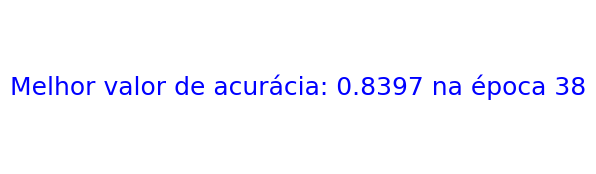

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.text(0.5, 0.5, f"Melhor valor de acurácia: {melhor_val_acc:.4f} na época {melhor_epoca}",
        fontsize=18, ha='center', va='center', color='blue')
plt.show()


/tmp/ipython-input-2462253308.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


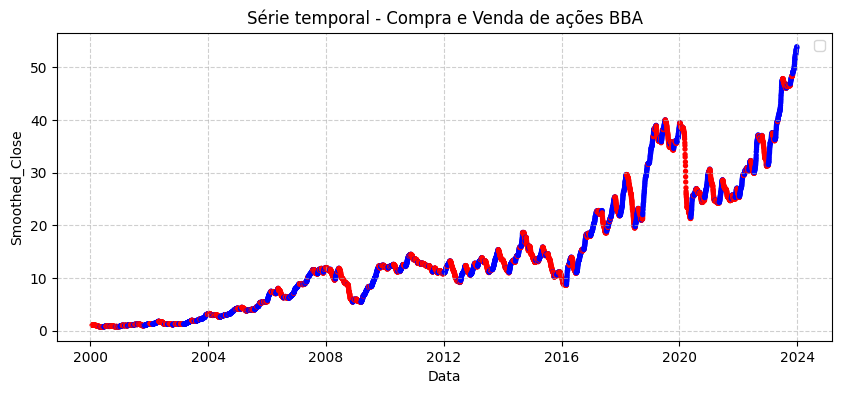

In [ ]:
plt.figure(figsize=(10,4))


plt.scatter(df_train["Date"], df_train["Smoothed_Close"],
            c=np.where(df_train["Label"] == 1, "blue", "red"), s=8)
plt.scatter(df_test["Date"], df_test["Smoothed_Close"],
            c=np.where(df_test["Label"] == 1, "blue", "red"), s=8)


plt.xlabel("Data")
plt.ylabel("Smoothed_Close")
plt.title("Série temporal - Compra e Venda de ações BBA")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

O gráfico acima apenas mostra a distribuição de rótulos de compra e venda de ações, mostrando como esse valores estão bem balanceados no dataset.

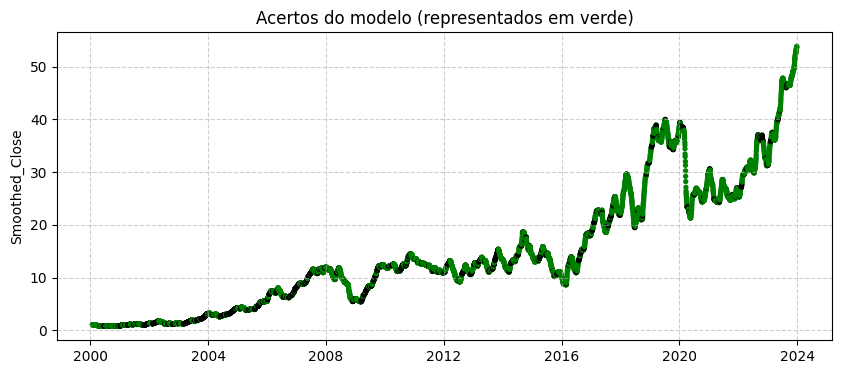

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))


plt.scatter(df_train["Date"], df_train["Smoothed_Close"],
            c=np.where(pred_train.flatten() == y_train, "green", "black"), s=8)
plt.scatter(df_test["Date"], df_test["Smoothed_Close"],
            c=np.where(pred_test.flatten() == y_test, "green", "black"), s=8)



plt.ylabel("Smoothed_Close")
plt.title("Acertos do modelo (representados em verde)")

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Neste gráfico é possível ver que no começo da curva o modelo erra mais (mais pontos em preto), mostrando que quando há oscilações maiores o modelo é mais eficaz em prever a ação a ser tomada.

# Métricas de Desempenho do Modelo

In [ ]:
hist = history.history

acc_train_ultima_epoca = hist['accuracy'][-1]
acc_val_ultima_epoca   = hist['val_accuracy'][-1]  # se houver validação
print("Train acc (últ. época):", acc_train_ultima_epoca)
print("Val   acc (últ. época):", acc_val_ultima_epoca)

Train acc (últ. época): 0.7934530377388
Val   acc (últ. época): 0.7755274176597595


**Um valor alto para a acurácia do treino e baixo para a acurácia de validação indicam overfitting.**

Confusion matrix:
 [[569 120]
 [ 70 426]]
Precision: 0.7802  |  Recall: 0.8589

Classification report:
               precision    recall  f1-score   support

           0     0.8905    0.8258    0.8569       689
           1     0.7802    0.8589    0.8177       496

    accuracy                         0.8397      1185
   macro avg     0.8353    0.8424    0.8373      1185
weighted avg     0.8443    0.8397    0.8405      1185



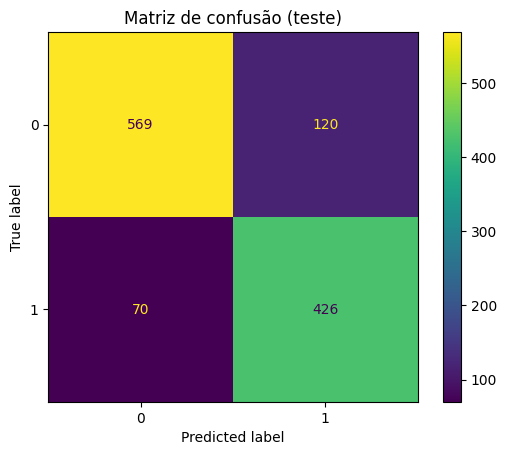

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#Métricas
cm = confusion_matrix(y_test, pred_test)
prec = precision_score(y_test, pred_test, zero_division=0)
rec  = recall_score(y_test, pred_test, zero_division=0)

print("Confusion matrix:\n", cm)
print(f"Precision: {prec:.4f}  |  Recall: {rec:.4f}")
print("\nClassification report:\n", classification_report(y_test, pred_test, digits=4))

# 4) (opcional) Plot da matriz de confusão
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(values_format="d")
plt.title("Matriz de confusão (teste)")
plt.show()

A precisão é menor que o recall, mostra que o modelo comete mais erros na hora de comprar (faz compras de ações em momentos desfavoráveis), o que é problemático para esse caso. Apesar da boa acurácia encontrada, o modelo poderia ser ajustado com mais cautela para se obter um valor melhor da precisão, o que retornaria um melhor resultado financeiro.

# Retorno Financeiro do Modelo

In [ ]:
df = pd.concat([df_train, df_test], axis=0)

In [ ]:
df.shape

(5920, 20)

In [ ]:
df["Date"]  = pd.to_datetime(df["Date"], errors="coerce")

Para avaliar se o modelo proporciona um bom resultado financeiro, vamos calcular o lucro que seria obtido com as ações definidas por especialistas (rótulos definidos no dataframe original) e também o lucro que seria obtido pelo modelo ajustado. Toda vez que o rótulo é 1 a função abaixo irá comprar apenas 1 ação, e quando o rótulo for 0 irá vender apenas uma ação. Isso servirá apenas para nos dar um parâmetro de comparação de performance entre os rótulos designados por especialistas e os preditos pelo modelo.

In [ ]:
def retorno_financeiro(df, caixa_inicial, acoes_inicial):
  Ci = caixa_inicial
  Qi = acoes_inicial
  rotulos = df["Label"]
  precos = df["Close"]
  patrimonio = []
  patrimoio_inicial = Ci + (Qi * precos.iloc[0])
  for i in range(1, len(rotulos)):
    if rotulos.iloc[i] == 1:
      Ci = Ci - (precos.iloc[i-1])
      Qi = Qi + 1
    elif rotulos.iloc[i] == 0:
      Ci = Ci + (precos.iloc[i-1] )
      Qi = Qi - 1
    patrimonio.append(Ci + (Qi * precos.iloc[i]))

  patrimonio_final = patrimonio[-1]
  print(f"O patrimonio inicial: {patrimonio[0]:.2f}")
  print(f"O patrimônio final obtido foi de: {patrimonio_final:.2f}")
  return patrimonio

In [ ]:
y_predito = pd.concat([pd.Series(pred_train.flatten()), pd.Series(pred_test.flatten())])
print(y_predito.head())
print(y_predito.unique())
print(y_predito.value_counts())

0    0
1    0
2    0
3    0
4    0
dtype: int64
[0 1]
0    4810
1    1110
Name: count, dtype: int64


In [ ]:
df_modelo = pd.concat([df["Date"], df["Close"], y_predito], axis=1)
df_modelo.columns = ['Date', 'Close', 'Label']
df_modelo.head()

,Date,Close,Label
0,2000-01-24,1.062769,0
1,2000-01-26,1.087668,0
2,2000-01-27,1.064080,0
3,2000-01-28,1.036561,0
4,2000-01-31,1.035250,0


No dataframe existem 3291 de rótulos de venda e 2629 de rótulos de compra, por isso dependendo da quantidade de ações inicias adicionadas a função não irá funcionar, já que n_ações ficaria negativa de forma que todos os resultados obtidos multiplicando essa variável ficariam negativos.

In [ ]:
retorno_especialista = retorno_financeiro(df, 10000, 10000)

O patrimonio inicial: 20876.68
O patrimônio final obtido foi de: 668398.61


In [ ]:
retorno_modelo = retorno_financeiro(df_modelo, 10000, 10000)

O patrimonio inicial: 20876.65
O patrimônio final obtido foi de: 386132.10


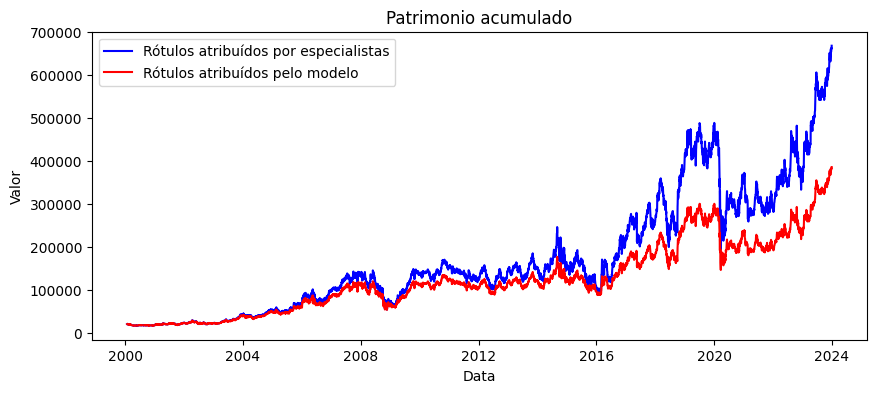

In [ ]:
plt.figure(figsize=(10,4))

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df_modelo["Date"]  = pd.to_datetime(df_modelo["Date"], errors="coerce")

plt.plot(df["Date"][1:], retorno_especialista, color="blue", label="Rótulos atribuídos por especialistas")
plt.plot(df_modelo["Date"][1:], retorno_modelo, color="red", label="Rótulos atribuídos pelo modelo")


plt.ylabel("Valor")
plt.xlabel("Data")
plt.title("Patrimonio acumulado")
plt.legend()

plt.show()

Referências


Zeng, Zhen, et al. "Financial time series forecasting using cnn and transformer." arXiv preprint arXiv:2304.04912 (2023).

